Power Consumption: System Level
---

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Fig d) Test Accuracy vs noise

In [4]:
noise = np.array([0, 0.05, 0.1, 0.15, 0.2])*100
noise = noise.astype(int)

d700_16     = np.array([90.88,  90.12,  87.50,  83.48,  77.75])
d700_16_std = np.array([0.4472, 0.9043, 0.8073, 0.4092, 0.8296])

d256_16     = np.array([86.99, 85.42, 81.43,  76.04,  71.30])
d256_16_std = np.array([0.093, 0.763, 1.121,  1.612, 0.0123])

# [74.01, 66.7, 51.21, 44.87]
# [1.41, 1.632, 2.607, 4.762]
r256_180     = np.array([77.40, 74.01, 66.70, 51.21, 44.87])
r256_180_std = np.array([0.511, 1.410, 1.632, 2.607, 4.762])

# [75.37, 69.62, 58.95, 50.40]
# [1.324, 1.118, 0.556, 1.374]
r700_235     = np.array([78.37, 75.37, 69.62, 58.95, 50.40])
r700_235_std = np.array([0.624, 1.324, 1.118, 0.556, 1.374])

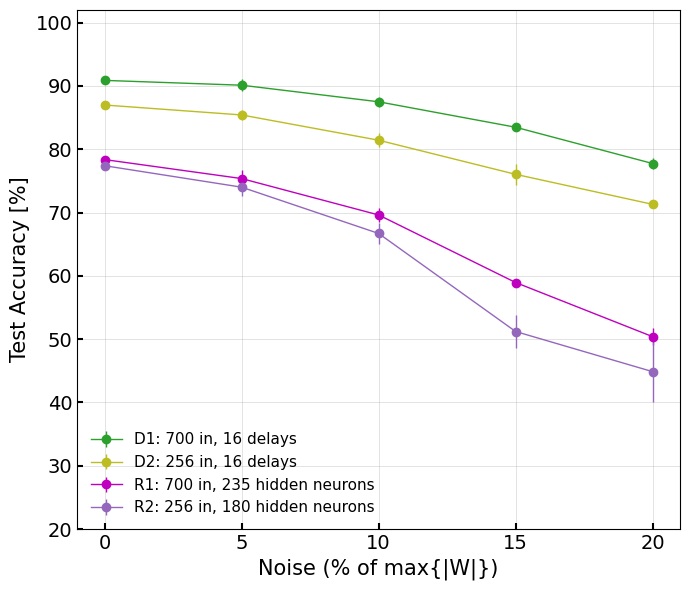

In [5]:
import matplotlib.pyplot as plt
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots( figsize=(700*px, 600*px) )
# d in green, r in purple, 700 lines, 256 dashed, width 1.5
linewidth = 1
ax.errorbar( noise, d700_16, yerr=d700_16_std, fmt='o-', color='tab:green', label='D1: 700 in, 16 delays', linewidth=linewidth)
ax.errorbar( noise, d256_16, yerr=d256_16_std, fmt='o-', color='tab:olive', label='D2: 256 in, 16 delays', linewidth=linewidth )
ax.errorbar( noise, r700_235, yerr=r700_235_std, fmt='o-', color='m', label='R1: 700 in, 235 hidden neurons', linewidth=linewidth )
ax.errorbar( noise, r256_180, yerr=r256_180_std, fmt='o-', color='tab:purple', label='R2: 256 in, 180 hidden neurons', linewidth=linewidth )
# set the width of the line

ax.set_xlabel( 'Noise (% of max{|W|})', size=15 )
ax.set_ylabel( 'Test Accuracy [%]', size=15 )
ax.tick_params( labelsize=14, direction='in', size=4, width=1.5)
#only display ticks of noise
ax.set_xticks( noise )
# ticks in 
ax.set_ylim( 20, 102 )
ax.legend( loc='lower left', fontsize=11, frameon=False, ncol=1)
#plot grid
ax.grid( linestyle='-', linewidth=0.5, alpha=0.5 )
# save as svg
plt.savefig( 'acc_vs_noise.pdf', format='pdf', dpi=500, transparent=True )
plt.tight_layout()

# Fig. 4e)  Accuracy vs # params

In [6]:
# 50-800: https://wandb.ai/torchet-tristan/RSNN-NoiseFree/sweeps/1tavfqox/table?workspace=user-torchet-tristan
# 1600: https://wandb.ai/torchet-tristan/RSNN-NoiseFree/sweeps/gcfnbry7/table?workspace=user-torchet-tristan
# 3200: https://wandb.ai/torchet-tristan/RSNN-NoiseFree/sweeps/69wfnc3v/table?workspace=user-torchet-tristan
n_rec     = np.array([3200,  1600,  800,   400,   200,   100,   50])
n_rec_acc = np.array([76.06, 75.72, 74.20, 71.69, 65.63, 60.28, 51.38]) 
n_rec_std = np.array([1.234, 1.234, 0.528, 0.286, 1.916, 2.684, 1.557]) # TODO: Fake value [3200] [1600]

# https://wandb.ai/torchet-tristan/MD2-mem-mempos-SOTA-noise/sweeps/3h440yll
n_del_256     = np.array([64,      32,       16,       8,       4,        2])
n_del_256_acc = np.array([81.47,   83.60,    81.43,    78.56,   72.01,    57.09]) 
n_del_256_std = np.array([0.309,   1.097,    1.121,    0.970,   1.233,    1.072])

# https://wandb.ai/torchet-tristan/MD2-mem-mempos-SOTA-noise/sweeps/bm4e3ede
n_del_700     = np.array([32,      16,       8,        4,       2])
n_del_700_acc = np.array([85.94,   87.50,    84.00,    79.90,   52.33]) 
n_del_700_std = np.array([0.381,   0.8073,   0.824,    0.329,   1.992])


In [7]:
params_del_fn = lambda n_in, n_del: n_in*n_del*20 # *2, not counting the delays as parameters for this plot as they are untrained
n_del_256_params = params_del_fn(256, n_del_256)
n_del_700_params = params_del_fn(700, n_del_700)
params_rec_fn = lambda n_in, n_rec: (n_in+n_rec+20)*n_rec
n_rec_params = params_rec_fn(256, n_rec)
print( n_del_256_params )
print( n_del_700_params )
print( n_rec_params )


[327680 163840  81920  40960  20480  10240]
[448000 224000 112000  56000  28000]
[11123200  3001600   860800   270400    95200    37600    16300]


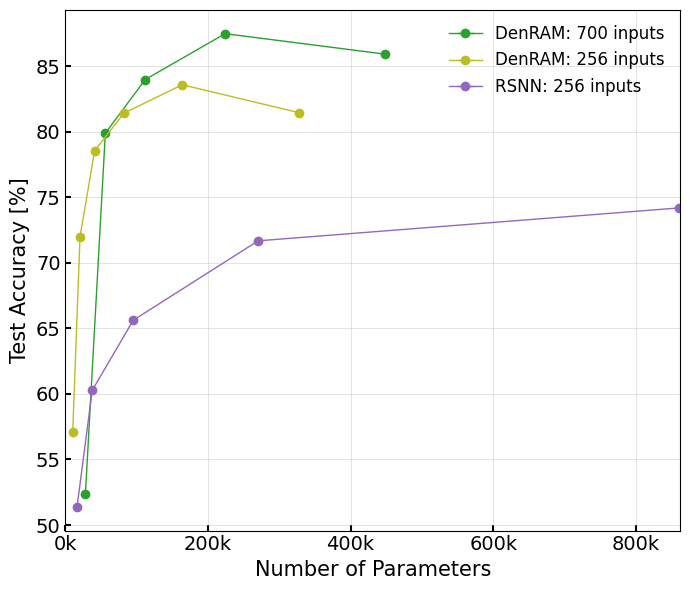

In [11]:
import matplotlib.pyplot as plt
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots( figsize=(700*px, 600*px) )
# d in green, r in purple, 700 lines, 256 dashed
ax.errorbar( n_del_700_params, n_del_700_acc, xerr=n_del_700_std, fmt='o-', color='tab:green', label='DenRAM: 700 inputs', linewidth=linewidth )
ax.errorbar( n_del_256_params, n_del_256_acc, xerr=n_del_256_std, fmt='o-', color='tab:olive', label='DenRAM: 256 inputs', linewidth=linewidth )
ax.errorbar( n_rec_params[2:], n_rec_acc[2:], xerr=n_rec_std[2:], fmt='o-', color='tab:purple', label='RSNN: 256 inputs', linewidth=linewidth )
ax.set_xlabel( 'Number of Parameters', size=15 )
# recover x_ticks
locs, labels = plt.xticks()
plt.xticks( locs, [f'{int(locs[i]/1000)}k' for i in range(len(locs))] )
# ax.set_xticklabels( ['0', '50k', '100k', '200k', '400k', '800k', '1.6M'] )
ax.set_ylabel( 'Test Accuracy [%]', size=15 )
ax.tick_params( labelsize=14, direction='in', size=4, width=1.5)
#only display ticks of noise
# ticks in
# ax.set_xlim( 0, 100 )
ax.set_xlim( 0, 862000 )
ax.legend( loc='upper right', fontsize=12, frameon=False, ncol=1)
#plot grid
ax.grid( linestyle='-', linewidth=0.5, alpha=0.5 )
# inverse x and y axis
# save as svg
plt.savefig( 'acc_vs_params.pdf', format='pdf', dpi=500, transparent=True )
plt.tight_layout()

In [44]:
print(labels)

[Text(-200000.0, 0, '-200k'), Text(0.0, 0, '0k'), Text(200000.0, 0, '200k'), Text(400000.0, 0, '400k'), Text(600000.0, 0, '600k'), Text(800000.0, 0, '800k'), Text(1000000.0, 0, '1000k')]


# Fig. 4f)  Accuracy vs power

In [12]:
### DENRAM
# -- Neuron
E_read = 7.55e-12 #J per spike out
E_neuron = 1.25e-12 #J per spike out

# -- Dendrite
average_del = 30e-3 #s average delay from a dendrite circuit
p_del_dyn = 1.92e-9 #W dynamic power of the delay
p_del_sta = 1.10e-9 #W statit power of the delay
num_channels = 64
num_out = 20
num_delays = 8
T_shd = 1.4 #s duration of SHD digits
S_in = np.mean( [8582.7734, 8006.4788, 6629.198 , 7475.2678, 6958.5649, 6723.3233,
       4501.795 , 8391.5625, 6393.238 , 9033.0911, 8483.5328, 7984.9539,
       7891.4466, 8577.1114, 7498.6459, 6372.6271, 6068.3976, 9759.4199,
       5523.061 , 8889.6318] ) # these are the spikes per class in SHD
avg_spikes_channel = (S_in)/700 # average input spike count per channel, as these numbers are computed with 700 inputs
on_time_del_channel = avg_spikes_channel*average_del # average time a delay element is busy during inference
avg_duty_cycle_del = on_time_del_channel/T_shd

configs = [ # Delay Architecture configuration: [Nin, Ndels]
    [700, 16], # SOTA Dendrites, D1
    [256, 16], # Efficient Dendrites, D2
    [128, 4] , # small Dendrite D3, Iso-power with RSNN R1
]
configs = configs + [[256, 2*(2**i)] for i in range(10)] + [[700, 2*(2**i)] for i in range(10)]


# Power computation
P_delay = lambda ch, dels : ch*dels*num_out*( avg_duty_cycle_del*p_del_dyn + (1-avg_duty_cycle_del)*p_del_sta )
P_out_neurons = lambda ch, dels : (avg_spikes_channel*ch*dels*E_read)/T_shd
P_denram_shd = P_delay(configs[0][0],configs[0][1]) + P_out_neurons(configs[0][0], configs[0][1])

P_denram_shd = []
for ch, dels in configs:
    P_tot = P_delay(ch,dels) + P_out_neurons(ch, dels)
    P_denram_shd.append( P_tot )
    print(f'Input channels {ch}, # delays {dels}, Power Consumption {P_tot*1e6:.2f}uW')

Input channels 700, # delays 16, Power Consumption 289.15uW
Input channels 256, # delays 16, Power Consumption 105.74uW
Input channels 128, # delays 4, Power Consumption 13.22uW
Input channels 256, # delays 2, Power Consumption 13.22uW
Input channels 256, # delays 4, Power Consumption 26.44uW
Input channels 256, # delays 8, Power Consumption 52.87uW
Input channels 256, # delays 16, Power Consumption 105.74uW
Input channels 256, # delays 32, Power Consumption 211.49uW
Input channels 256, # delays 64, Power Consumption 422.98uW
Input channels 256, # delays 128, Power Consumption 845.96uW
Input channels 256, # delays 256, Power Consumption 1691.91uW
Input channels 256, # delays 512, Power Consumption 3383.83uW
Input channels 256, # delays 1024, Power Consumption 6767.66uW
Input channels 700, # delays 2, Power Consumption 36.14uW
Input channels 700, # delays 4, Power Consumption 72.29uW
Input channels 700, # delays 8, Power Consumption 144.57uW
Input channels 700, # delays 16, Power Consum

In [13]:
### RSNN
# -- Neuron
E_read = 7.55e-12 #J per spike out
E_neuron = 1.25e-12 #J per spike out

# -- Dendrite
num_channels = 700
n_rec = 235 # recurrent neurons
num_out = 20
T_shd = 1.4 #s duration of SHD digits
S_in = np.mean( [8582.7734, 8006.4788, 6629.198 , 7475.2678, 6958.5649, 6723.3233,
       4501.795 , 8391.5625, 6393.238 , 9033.0911, 8483.5328, 7984.9539,
       7891.4466, 8577.1114, 7498.6459, 6372.6271, 6068.3976, 9759.4199,
       5523.061 , 8889.6318] ) # these are the spikes per class in SHD
avg_spikes_channel = (S_in)/700 # average input spike count per channel, as these numbers are computed with 700 inputs
num_spikes_rec_neuron = 12
S_rec = num_spikes_rec_neuron*n_rec

configs_rsnn = [ # Delay Architecture configuration: [Nin, Ndels]
    [700, 235], # Large RSNN, R1 240k
    [256, 180], # Efficient RSNN, R2, 80k
]
configs_rsnn = configs_rsnn + [[256, 200*(2**i)] for i in range(10)] + [[700, 200*(2**i)] for i in range(10)]
# P_RSNN = ( S_in*E_read * n_rec + S_rec * ( E_read * (n_rec+num_out) + E_neuron ) )/ T_shd
# print( f'Denram SHD power {P_RSNN*1e6:.2f}uW' )
P_RSNN_lambda = lambda ch, n:  ( avg_spikes_channel*ch*E_read*n + S_rec * ( E_read * (n+num_out) + E_neuron ) )/ T_shd

P_rsnn_shd = []
for ch, n in configs_rsnn:
    P_tot = P_RSNN_lambda(ch,n)
    P_rsnn_shd.append( P_tot )
    print(f'Input channels {ch}, # Recurrent neurons {n}, RSNN Power Consumption {P_tot*1e6:.2f}uW')


Input channels 700, # Recurrent neurons 235, RSNN Power Consumption 13.37uW
Input channels 256, # Recurrent neurons 180, RSNN Power Consumption 5.70uW
Input channels 256, # Recurrent neurons 200, RSNN Power Consumption 6.30uW
Input channels 256, # Recurrent neurons 400, RSNN Power Consumption 12.30uW
Input channels 256, # Recurrent neurons 800, RSNN Power Consumption 24.29uW
Input channels 256, # Recurrent neurons 1600, RSNN Power Consumption 48.27uW
Input channels 256, # Recurrent neurons 3200, RSNN Power Consumption 96.22uW
Input channels 256, # Recurrent neurons 6400, RSNN Power Consumption 192.14uW
Input channels 256, # Recurrent neurons 12800, RSNN Power Consumption 383.98uW
Input channels 256, # Recurrent neurons 25600, RSNN Power Consumption 767.65uW
Input channels 256, # Recurrent neurons 51200, RSNN Power Consumption 1535.00uW
Input channels 256, # Recurrent neurons 102400, RSNN Power Consumption 3069.69uW
Input channels 700, # Recurrent neurons 200, RSNN Power Consumption 11.

In [15]:
n_rec     = np.array([3200,  1600,  800,   400,   200,   100,   50])

P_RSNN_lambda = lambda ch, n:  ( avg_spikes_channel*ch*E_read*n + S_rec * ( E_read * (n+num_out) + E_neuron ) )/ T_shd
n_rec_pwr = np.array([P_RSNN_lambda(256, n) for n in n_rec])*1e6 # in uW
# round to 1 decimal places
n_rec_pwr = np.round( n_rec_pwr, 0 )
print( n_rec_pwr )

P_delay = lambda ch, dels : ch*dels*num_out*( avg_duty_cycle_del*p_del_dyn + (1-avg_duty_cycle_del)*p_del_sta )
P_out_neurons = lambda ch, dels : (avg_spikes_channel*ch*dels*E_read)/T_shd

configs = [[256, n] for n in n_del_256]
P_denram_shd = P_delay(configs[0][0],configs[0][1]) + P_out_neurons(configs[0][0], configs[0][1])
n_del_256_pwr = np.array([P_denram_shd, P_denram_shd/2, P_denram_shd/4, P_denram_shd/8, P_denram_shd/16, P_denram_shd/32])*1e6 # in uW

configs = [[700, n] for n in n_del_700]
P_denram_shd = P_delay(configs[0][0],configs[0][1]) + P_out_neurons(configs[0][0], configs[0][1])
n_del_700_pwr = np.array([P_denram_shd, P_denram_shd/2, P_denram_shd/4, P_denram_shd/8, P_denram_shd/16])*1e6 # in uW

# round to 1 decimal places
n_del_256_pwr = np.round( n_del_256_pwr, 0 )
print( n_del_256_pwr )
n_del_700_pwr = np.round( n_del_700_pwr, 0 )
print( n_del_700_pwr )

[96. 48. 24. 12.  6.  3.  2.]
[423. 211. 106.  53.  26.  13.]
[578. 289. 145.  72.  36.]


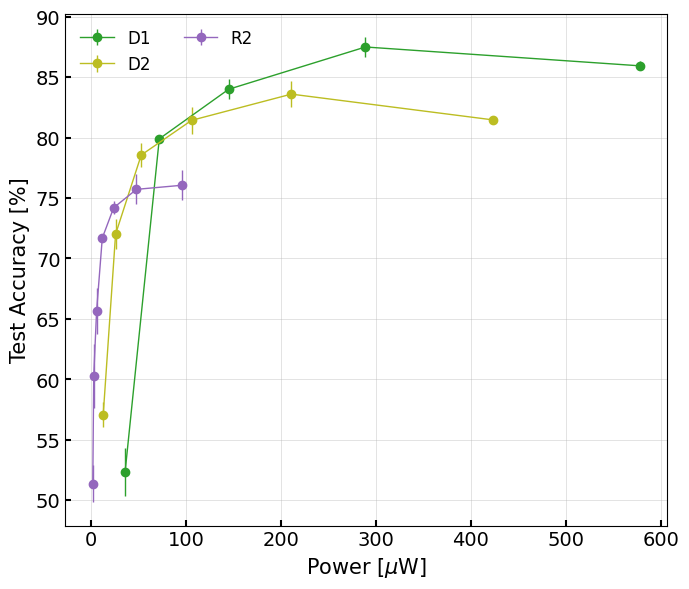

In [16]:
import matplotlib.pyplot as plt
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
plt.rcParams['text.usetex'] = False
fig, ax = plt.subplots( figsize=(700*px, 600*px) )
# d in green, r in purple, 700 lines, 256 dashed
# ax.errorbar( n_del_700_acc, n_del_700_pwr, xerr=n_del_700_std, fmt='o-', color='tab:green', label='D1', linewidth=linewidth )
# ax.errorbar( n_del_256_acc, n_del_256_pwr, xerr=n_del_256_std, fmt='o-', color='tab:olive', label='D2', linewidth=linewidth )
# ax.errorbar( n_rec_acc, n_rec_pwr, xerr=n_rec_std, fmt='o-', color='tab:purple', label='R2', linewidth=linewidth )
ax.errorbar( n_del_700_pwr, n_del_700_acc, yerr=n_del_700_std, fmt='o-', color='tab:green', label='D1', linewidth=linewidth )
ax.errorbar( n_del_256_pwr, n_del_256_acc, yerr=n_del_256_std, fmt='o-', color='tab:olive', label='D2', linewidth=linewidth )
ax.errorbar( n_rec_pwr, n_rec_acc, yerr=n_rec_std, fmt='o-', color='tab:purple', label='R2', linewidth=linewidth )

ax.set_ylabel( 'Power [$\mu$W]', size=15 )
ax.set_xlabel( 'Test Accuracy [%]', size=15 )

ax.set_xlabel( 'Power [$\mu$W]', size=15 )
ax.set_ylabel( 'Test Accuracy [%]', size=15 )

ax.tick_params( labelsize=14, direction='in', size=4, width=1.5)
#only display ticks of noise
# ticks in
# ax.set_xlim( 0, 100 )
# ax.set_ylim( 20, 105 )
ax.legend( loc='upper left', fontsize=12, frameon=False, ncol=2)
#plot grid
ax.grid( linestyle='-', linewidth=0.5, alpha=0.5 )

# inverse x and y axis
# save as svg
plt.savefig( 'power_vs_acc.pdf', format='pdf', dpi=500, transparent=True )
# background transparent
plt.tight_layout()
